<a href="https://colab.research.google.com/github/w-023/data-science-bootcamp/blob/master/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 2.0.2
Pandas: 2.2.2


### <a name='a2'></a> Załadowanie danych

In [2]:
def fetch_financial_data(company='AMZN'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-12-12 to 2020-12-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


### <a name='a3'></a> Eksploracja danych

In [3]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2025-12-12,229.870,230.080,225.1200,226.190,35639118
2025-12-11,230.710,232.110,228.6901,230.280,28249599
2025-12-10,228.805,232.420,228.4600,231.780,38790736
2025-12-09,226.840,228.570,225.1100,227.920,25841743
2025-12-08,229.590,230.830,226.2700,226.890,35019174
...,...,...,...,...,...
2020-12-21,160.001,161.348,158.3000,160.309,76736920
2020-12-18,162.200,162.471,158.5800,160.082,119914260
2020-12-17,162.500,163.176,161.0500,161.804,69486940


from matplotlib import pyplot as plt
df['Open'].plot(kind='hist', bins=20, title='Open')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='hist', bins=20, title='High')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='hist', bins=20, title='Low')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Open', y='High', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='High', y='Low', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Low', y='Close', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='Close', y='Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df['Open'].plot(kind='line', figsize=(8, 4), title='Open')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['High'].plot(kind='line', figsize=(8, 4), title='High')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Low'].plot(kind='line', figsize=(8, 4), title='Low')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [7]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2025-12-12,229.870,230.08,225.1200,226.19,35639118
2025-12-11,230.710,232.11,228.6901,230.28,28249599
2025-12-10,228.805,232.42,228.4600,231.78,38790736
2025-12-09,226.840,228.57,225.1100,227.92,25841743
2025-12-08,229.590,230.83,226.2700,226.89,35019174


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0


In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0
2010-01-04,136.28,136.61,133.14,133.90,7595995.0


In [ ]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-15,129.35,129.65,127.06,127.14,15358332.0
2010-01-14,129.18,130.38,126.40,127.35,9704287.0
2010-01-13,128.07,129.71,125.75,129.11,10723052.0
2010-01-12,129.06,129.82,126.55,127.35,9091795.0
2010-01-11,132.73,132.80,129.21,130.31,8777511.0
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0


In [9]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [8]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2025-12-12,229.870,230.08,225.1200,226.19,35639118
2025-12-11,230.710,232.11,228.6901,230.28,28249599
2025-12-10,228.805,232.42,228.4600,231.78,38790736
2025-12-09,226.840,228.57,225.1100,227.92,25841743
2025-12-08,229.590,230.83,226.2700,226.89,35019174


In [10]:
df.describe()

,open,high,low,close,volume
count,1255.000000,1255.000000,1255.000000,1255.000000,1.255000e+03
mean,162.821183,164.723118,160.754084,162.763560,5.799448e+07
std,39.915073,40.031803,39.647421,39.835209,2.719919e+07
min,82.800000,83.480000,81.430000,81.820000,1.500750e+07
25%,132.055000,133.630000,130.462500,132.025000,4.023050e+07
50%,165.251000,166.689900,163.697000,165.056000,5.167941e+07
75%,186.875000,188.395000,184.660000,186.525000,6.792798e+07
max,255.360000,258.600000,252.900000,254.000000,2.726617e+08


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1255.0,1.628212e+02,3.991507e+01,82.80,1.320550e+02,1.652510e+02,1.868750e+02,2.553600e+02
high,1255.0,1.647231e+02,4.003180e+01,83.48,1.336300e+02,1.666899e+02,1.883950e+02,2.586000e+02
low,1255.0,1.607541e+02,3.964742e+01,81.43,1.304625e+02,1.636970e+02,1.846600e+02,2.529000e+02
close,1255.0,1.627636e+02,3.983521e+01,81.82,1.320250e+02,1.650560e+02,1.865250e+02,2.540000e+02
volume,1255.0,5.799448e+07,2.719919e+07,15007497.00,4.023050e+07,5.167941e+07,6.792798e+07,2.726617e+08


### <a name='a4'></a> Selekcja kolumn

In [13]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2025-12-12,229.870,230.080,225.1200,226.19,35639118
2025-12-11,230.710,232.110,228.6901,230.28,28249599
2025-12-10,228.805,232.420,228.4600,231.78,38790736
2025-12-09,226.840,228.570,225.1100,227.92,25841743
2025-12-08,229.590,230.830,226.2700,226.89,35019174
2025-12-05,230.320,231.240,228.5470,229.53,33117377
2025-12-04,232.770,233.500,226.8000,229.11,45683224
2025-12-03,233.350,233.380,230.6100,232.38,35495058
2025-12-02,235.005,238.970,233.5500,234.42,45785363


In [14]:
df['open']

,open
Date,
2025-12-12,229.870
2025-12-11,230.710
2025-12-10,228.805
2025-12-09,226.840
2025-12-08,229.590
2025-12-05,230.320
2025-12-04,232.770
2025-12-03,233.350
2025-12-02,235.005


In [15]:
df.open

,open
Date,
2025-12-12,229.870
2025-12-11,230.710
2025-12-10,228.805
2025-12-09,226.840
2025-12-08,229.590
2025-12-05,230.320
2025-12-04,232.770
2025-12-03,233.350
2025-12-02,235.005


In [ ]:
df[['open']]

,open
Date,
2019-12-10,1747.40
2019-12-09,1750.66
2019-12-06,1751.20
2019-12-05,1763.50
2019-12-04,1774.01
2019-12-03,1760.00
2019-12-02,1804.40
2019-11-29,1817.78
2019-11-27,1801.00


In [ ]:
df[['open', 'close']]

,open,close
Date,,
2019-12-10,1747.40,1739.21
2019-12-09,1750.66,1749.42
2019-12-06,1751.20,1751.60
2019-12-05,1763.50,1740.48
2019-12-04,1774.01,1760.69
2019-12-03,1760.00,1769.96
2019-12-02,1804.40,1781.60
2019-11-29,1817.78,1800.80
2019-11-27,1801.00,1818.51


In [16]:
df.iloc[:, 0]

,open
Date,
2025-12-12,229.870
2025-12-11,230.710
2025-12-10,228.805
2025-12-09,226.840
2025-12-08,229.590
2025-12-05,230.320
2025-12-04,232.770
2025-12-03,233.350
2025-12-02,235.005


In [19]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2025-12-12,229.870,226.19
2025-12-11,230.710,230.28
2025-12-10,228.805,231.78
2025-12-09,226.840,227.92
2025-12-08,229.590,226.89
2025-12-05,230.320,229.53
2025-12-04,232.770,229.11
2025-12-03,233.350,232.38
2025-12-02,235.005,234.42


In [ ]:
df.iloc[:, 3:5]

,close,volume
Date,,
2019-12-10,1739.21,2515644.0
2019-12-09,1749.42,2502489.0
2019-12-06,1751.60,3119979.0
2019-12-05,1740.48,2827852.0
2019-12-04,1760.69,2680700.0
2019-12-03,1769.96,3529582.0
2019-12-02,1781.60,3931750.0
2019-11-29,1800.80,1923440.0
2019-11-27,1818.51,3023355.0


In [17]:
df.iloc[:, -1]

,volume
Date,
2025-12-12,35639118
2025-12-11,28249599
2025-12-10,38790736
2025-12-09,25841743
2025-12-08,35019174
2025-12-05,33117377
2025-12-04,45683224
2025-12-03,35495058
2025-12-02,45785363


In [18]:
df.iloc[:, [-1]]

,volume
Date,
2025-12-12,35639118
2025-12-11,28249599
2025-12-10,38790736
2025-12-09,25841743
2025-12-08,35019174
2025-12-05,33117377
2025-12-04,45683224
2025-12-03,35495058
2025-12-02,45785363


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2019-12-10,1735.00,1739.21,2515644.0
2019-12-09,1745.61,1749.42,2502489.0
2019-12-06,1740.13,1751.60,3119979.0
2019-12-05,1740.00,1740.48,2827852.0
2019-12-04,1760.22,1760.69,2680700.0
2019-12-03,1747.23,1769.96,3529582.0
2019-12-02,1762.68,1781.60,3931750.0
2019-11-29,1800.79,1800.80,1923440.0
2019-11-27,1797.31,1818.51,3023355.0


### <a name='a5'></a>  Selekcja wierszy

In [20]:
df

,open,high,low,close,volume
Date,,,,,
2025-12-12,229.870,230.080,225.1200,226.19,35639118
2025-12-11,230.710,232.110,228.6901,230.28,28249599
2025-12-10,228.805,232.420,228.4600,231.78,38790736
2025-12-09,226.840,228.570,225.1100,227.92,25841743
2025-12-08,229.590,230.830,226.2700,226.89,35019174
2025-12-05,230.320,231.240,228.5470,229.53,33117377
2025-12-04,232.770,233.500,226.8000,229.11,45683224
2025-12-03,233.350,233.380,230.6100,232.38,35495058
2025-12-02,235.005,238.970,233.5500,234.42,45785363


In [21]:
df.iloc[0]

,2025-12-12
open,229.87
high,230.08
low,225.12
close,226.19
volume,35639118.00


In [22]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2025-12-12,229.870,230.08,225.1200,226.19,35639118
2025-12-11,230.710,232.11,228.6901,230.28,28249599
2025-12-10,228.805,232.42,228.4600,231.78,38790736


In [ ]:
df

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0
2019-11-29,1817.78,1824.69,1800.79,1800.80,1923440.0
2019-11-27,1801.00,1824.50,1797.31,1818.51,3023355.0


In [29]:
df.loc['2019-12-10': '2019-12-02']

KeyError: 'Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is not allowed.'

### <a name='a6'></a> Obliczanie nowych kolumn

In [27]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1255 entries, 2025-12-12 to 2020-12-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1255 non-null   float64
 1   High    1255 non-null   float64
 2   Low     1255 non-null   float64
 3   Close   1255 non-null   float64
 4   Volume  1255 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.8 KB


In [36]:
df = df.sort_index()
df = df.loc['2024-01-01': '2024-12-31']

In [38]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02,60.73,60.910,57.93,58.38,41978581
2024-01-03,57.48,58.895,57.33,58.25,31800559
2024-01-04,58.25,58.985,57.73,57.80,20370664
2024-01-05,58.11,58.510,57.22,57.58,17886260
2024-01-08,58.09,59.160,57.85,59.01,21213042


In [37]:
df.describe()

,Open,High,Low,Close,Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,70.913552,71.838326,69.770247,70.766865,1.920456e+07
std,5.917203,5.897355,5.860427,5.886949,1.128833e+07
min,55.530000,58.510000,54.840000,57.580000,6.599189e+06
25%,66.367500,67.297500,65.512500,66.127500,1.276786e+07
50%,71.355000,72.210000,70.230000,71.205000,1.624990e+07
75%,75.012500,75.782500,73.742500,74.762500,2.158356e+07
max,85.640000,87.000000,84.180000,86.340000,8.421997e+07


In [39]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-01-02,60.73,60.910,57.93,58.38,41978581
2024-01-03,57.48,58.895,57.33,58.25,31800559
2024-01-04,58.25,58.985,57.73,57.80,20370664


In [40]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-01-02,60.73,60.910,57.93,58.38,41978581,59.555
2024-01-03,57.48,58.895,57.33,58.25,31800559,57.865
2024-01-04,58.25,58.985,57.73,57.80,20370664,58.025
2024-01-05,58.11,58.510,57.22,57.58,17886260,57.845
2024-01-08,58.09,59.160,57.85,59.01,21213042,58.550


In [ ]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240


In [42]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2024-01-02,60.73,60.910,57.93,58.38,41978581,59.555,NaN
2024-01-03,57.48,58.895,57.33,58.25,31800559,57.865,58.38
2024-01-04,58.25,58.985,57.73,57.80,20370664,58.025,58.25
2024-01-05,58.11,58.510,57.22,57.58,17886260,57.845,57.80
2024-01-08,58.09,59.160,57.85,59.01,21213042,58.550,57.58


In [43]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-01-02,60.73,60.910,57.93,58.38,41978581,59.555,NaN,NaN
2024-01-03,57.48,58.895,57.33,58.25,31800559,57.865,58.38,-0.002227
2024-01-04,58.25,58.985,57.73,57.80,20370664,58.025,58.25,-0.007725
2024-01-05,58.11,58.510,57.22,57.58,17886260,57.845,57.80,-0.003806
2024-01-08,58.09,59.160,57.85,59.01,21213042,58.550,57.58,0.024835


In [ ]:
del df['Daily Change']

In [ ]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.00,41.06,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.24,36.08,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.96,36.85,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.88,38.95,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.06,41.25,43.00,38115524,42.240,41.29,0.041414


In [44]:
df.Daily_Change.min()

-0.09603658536585358

In [45]:
df.Daily_Change.max()

0.14726771995941457

<Axes: >

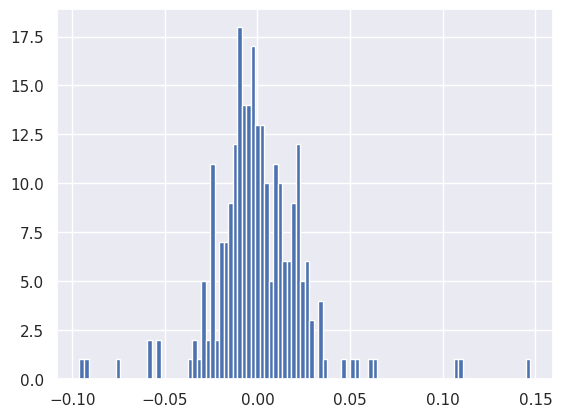

In [52]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

<Axes: xlabel='Date'>

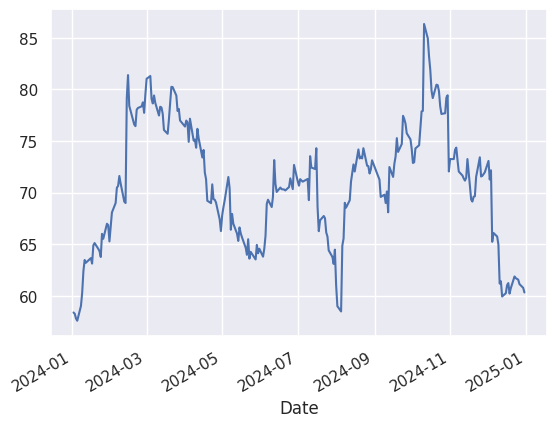

In [47]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [55]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-01-02,60.7300,60.910,57.93,58.38,41978581,59.5550,NaN,NaN
2024-01-03,57.4800,58.895,57.33,58.25,31800559,57.8650,58.38,-0.002227
2024-01-04,58.2500,58.985,57.73,57.80,20370664,58.0250,58.25,-0.007725
2024-01-05,58.1100,58.510,57.22,57.58,17886260,57.8450,57.80,-0.003806
2024-01-08,58.0900,59.160,57.85,59.01,21213042,58.5500,57.58,0.024835
...,...,...,...,...,...,...,...,...
2024-12-24,61.9700,61.980,60.88,61.71,7882461,61.8400,61.87,-0.002586
2024-12-26,61.5900,61.970,61.16,61.56,12683898,61.5750,61.71,-0.002431
2024-12-27,61.1856,61.260,60.02,61.13,13483564,61.1578,61.56,-0.006985


In [56]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-01-08,58.090,59.16,57.8500,59.01,21213042,58.5500,57.58,0.024835
2024-01-09,58.500,60.54,58.4500,60.30,22319853,59.4000,59.01,0.021861
2024-01-10,60.280,62.61,60.2800,62.41,30788925,61.3450,60.30,0.034992
2024-01-11,62.990,63.61,61.8600,63.47,28888928,63.2300,62.41,0.016984
2024-01-16,63.000,64.00,62.9200,63.65,19511781,63.3250,63.20,0.007120
...,...,...,...,...,...,...,...,...
2024-12-16,60.320,61.30,60.1200,60.25,38612401,60.2850,59.93,0.005340
2024-12-17,59.420,61.04,59.3300,61.03,35025487,60.2250,60.25,0.012946
2024-12-18,61.390,63.94,60.8500,61.23,46736705,61.3100,61.03,0.003277


In [57]:
df_positive.Daily_Change.mean()

np.float64(0.018878611109728886)

In [58]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-01-03,57.4800,58.895,57.33,58.25,31800559,57.8650,58.38,-0.002227
2024-01-04,58.2500,58.985,57.73,57.80,20370664,58.0250,58.25,-0.007725
2024-01-05,58.1100,58.510,57.22,57.58,17886260,57.8450,57.80,-0.003806
2024-01-12,63.2000,64.920,63.00,63.20,26374740,63.2000,63.47,-0.004254
2024-01-17,62.9500,63.420,61.68,63.12,19971592,63.0350,63.65,-0.008327
...,...,...,...,...,...,...,...,...
2024-12-24,61.9700,61.980,60.88,61.71,7882461,61.8400,61.87,-0.002586
2024-12-26,61.5900,61.970,61.16,61.56,12683898,61.5750,61.71,-0.002431
2024-12-27,61.1856,61.260,60.02,61.13,13483564,61.1578,61.56,-0.006985


In [59]:
 df_negative.Daily_Change.mean()

np.float64(-0.015263736107903462)

In [60]:
df.Close == df.High

,0
Date,
2024-01-02,False
2024-01-03,False
2024-01-04,False
2024-01-05,False
2024-01-08,False
...,...
2024-12-24,False
2024-12-26,False
2024-12-27,False


In [62]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,


In [64]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,


In [66]:
df.index > '2024-11-01'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [67]:
df[df.index > '2019-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-01-02,60.7300,60.910,57.93,58.38,41978581,59.5550,NaN,NaN
2024-01-03,57.4800,58.895,57.33,58.25,31800559,57.8650,58.38,-0.002227
2024-01-04,58.2500,58.985,57.73,57.80,20370664,58.0250,58.25,-0.007725
2024-01-05,58.1100,58.510,57.22,57.58,17886260,57.8450,57.80,-0.003806
2024-01-08,58.0900,59.160,57.85,59.01,21213042,58.5500,57.58,0.024835
...,...,...,...,...,...,...,...,...
2024-12-24,61.9700,61.980,60.88,61.71,7882461,61.8400,61.87,-0.002586
2024-12-26,61.5900,61.970,61.16,61.56,12683898,61.5750,61.71,-0.002431
2024-12-27,61.1856,61.260,60.02,61.13,13483564,61.1578,61.56,-0.006985


In [68]:
df[(df.index >= '2024-11-01') & (df.index < '2024-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-11-01,73.940,74.15,72.2500,73.25,33542204,73.5950,72.05,0.016655
2024-11-04,72.750,74.22,72.6600,73.25,14949148,73.0000,73.25,0.000000
2024-11-05,73.550,74.34,73.2400,74.15,12274566,73.8500,73.25,0.012287
2024-11-06,73.455,74.62,70.7412,74.36,26410662,73.9075,74.15,0.002832
2024-11-07,76.100,76.40,72.7400,73.13,24305902,74.6150,74.36,-0.016541
2024-11-08,73.440,73.56,71.5550,72.04,20152597,72.7400,73.13,-0.014905
2024-11-11,72.500,73.00,71.3400,71.65,22682174,72.0750,72.04,-0.005414
2024-11-12,71.960,72.68,71.2000,71.37,19439705,71.6650,71.65,-0.003908
2024-11-13,71.600,72.08,70.5500,71.16,15006009,71.3800,71.37,-0.002942


In [69]:
df[(df.index == '2024-11-01') | (df.index == '2024-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-11-01,73.94,74.15,72.25,73.25,33542204,73.595,72.05,0.016655
2024-11-07,76.10,76.40,72.74,73.13,24305902,74.615,74.36,-0.016541


In [70]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-01-02,60.7300,60.910,57.93,58.38,41978581,59.5550,NaN,NaN
2024-01-03,57.4800,58.895,57.33,58.25,31800559,57.8650,58.38,-0.002227
2024-01-04,58.2500,58.985,57.73,57.80,20370664,58.0250,58.25,-0.007725
2024-01-05,58.1100,58.510,57.22,57.58,17886260,57.8450,57.80,-0.003806
2024-01-08,58.0900,59.160,57.85,59.01,21213042,58.5500,57.58,0.024835
...,...,...,...,...,...,...,...,...
2024-12-24,61.9700,61.980,60.88,61.71,7882461,61.8400,61.87,-0.002586
2024-12-26,61.5900,61.970,61.16,61.56,12683898,61.5750,61.71,-0.002431
2024-12-27,61.1856,61.260,60.02,61.13,13483564,61.1578,61.56,-0.006985


In [71]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-05-01,66.040,69.4100,65.8600,67.79,21276158,66.9150,66.27,0.022936
2024-05-02,68.400,69.0360,67.6250,68.57,18229306,68.4850,67.79,0.011506
2024-05-03,69.845,70.3386,69.0300,69.23,15557671,69.5375,68.57,0.009625
2024-05-06,71.000,73.8200,70.8320,71.51,25001918,71.2550,69.23,0.032934
2024-05-07,72.640,72.6400,69.8000,70.43,24427252,71.5350,71.51,-0.015103
2024-05-08,64.500,67.2000,63.8353,66.40,84219974,65.4500,70.43,-0.057220
2024-05-09,66.810,68.5700,66.7500,67.93,27965536,67.3700,66.40,0.023042
2024-05-10,67.820,67.9000,66.4000,66.99,18924391,67.4050,67.93,-0.013838
2024-05-13,67.000,67.0637,64.7200,66.02,18983132,66.5100,66.99,-0.014480


In [72]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2024-02-01,66.12,66.85,65.59,66.73,12504225,66.425,65.27,0.022369
2024-03-01,79.50,81.47,79.32,81.03,18528745,80.265,79.50,0.019245
2024-04-01,77.00,77.78,76.00,76.40,12201773,76.700,76.99,-0.007663
2024-05-01,66.04,69.41,65.86,67.79,21276158,66.915,66.27,0.022936
2024-07-01,72.20,72.58,69.40,71.10,13438725,71.650,72.68,-0.021739
2024-08-01,64.86,65.00,60.76,61.02,18967935,62.940,64.47,-0.053513
2024-10-01,75.77,75.77,73.84,74.24,8980535,75.005,75.16,-0.012241
2024-11-01,73.94,74.15,72.25,73.25,33542204,73.595,72.05,0.016655
